# Lecture 02: Regressions & Models

Welcome back! In this lecture, we will cover Linear Regressions with Batch Gradient Descent and Stochastic Gradient Descent and Polynomial Regressions using different regressors offered by Scikit Learn.

In [1]:
import numpy as np
import sklearn
np.random.seed(42)

First, let us create a simple linearly correlated dataset!

In [2]:
m = 150
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1) # This creates noises

The graphical displays are optional. The code is just included here for visualization. Don't worry about the details behind it.

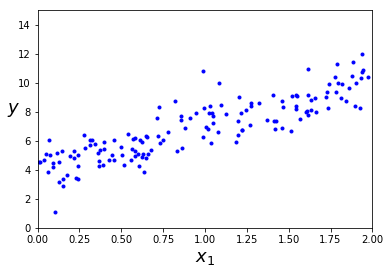

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Linear Regression using sklearn's linear regressor

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) # Regressor.fit() trains the model
lin_reg.intercept_, lin_reg.coef_

(array([3.96414683]), array([[3.08745334]]))

This shows that our equation is: y = coef * x + intercept

In [5]:
# Use the LinearRegression.predict() method to easily find prediction of other values
X_test = np.random.rand(5, 1)
print(X_test)
lin_reg.predict(X_test)

[[0.17320187]
 [0.43385165]
 [0.39850473]
 [0.6158501 ]
 [0.63509365]]


array([[4.49889952],
       [5.30364355],
       [5.1945116 ],
       [5.86555527],
       [5.92496885]])

We can also see the "score" of our regressor, namely the R^2 value, by using the .score() method.

## Linear Regression using Batch Gradient Descent

In [6]:
learning_rate = 0.1
n_iterations = 1000
m = 150

X_b = np.c_[np.ones((m, 1)), X] # Add x0 = 1 to each instance for dot product later
theta = np.random.rand(2, 1) # Random initialization

for iter in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y) # This is the partial derivative of the cost function
    theta = theta - learning_rate * gradients

In [7]:
theta

array([[3.96414683],
       [3.08745334]])

Look at that! The coefficient and the intercept is basically the same as when we used sklearn's LinearRegression! :D

## Stochastic Gradient Descent

In [8]:
n_epochs = 50
t0, t1 = 5, 50

theta = np.random.rand(2, 1) # Random initialization

# The learning steps start out large to escape local minima. Then the learning steps begin to decrease
# to avoid escaping from the global minimum
def learning_rate(t):
    return t0 / (t + t1)
    
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # Helps preserves the np.array type
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_rate(epoch * m + i)
        theta = theta - eta * gradients

In [9]:
theta

array([[3.95495553],
       [3.08320521]])

As we knew already, SGD will never settle at the global or absolute minimum. Thus, it makes sense to see the theta calculated here a little different from the ones we obtained from sklearn.LinearRegression and the BGD implementation above.

We just coded the SGD by hand. This time, we will be using sklearn's SGDRegressor provided.

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=2000, tol=1e-4, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=2000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.93550841]), array([3.06314292]))

## Polynomial Regression

In [12]:
import numpy as np

In [13]:
m = 150
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 - X + 2 + np.random.randn(m, 1)

Again, just for the sake of visualization, don't worry about how this piece of code works.

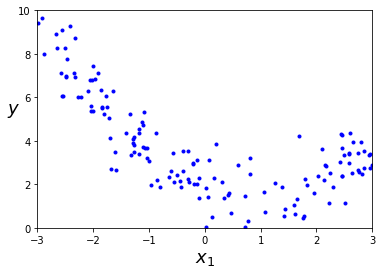

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Obviously a linear regression will not be the right model to predict this dataset. We will use the class PolynomialFeatures to create another feature made from the squared of the original feature.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly_feature = poly_feat.fit_transform(X)

In [16]:
print("Original Dataset:\n", X[0:5])
print("Modified Dataset with squared of original:\n", X_poly_feature[0:5])

Original Dataset:
 [[-1.9734842 ]
 [-2.32053929]
 [ 0.42112329]
 [ 2.17106294]
 [-0.13734109]]
Modified Dataset with squared of original:
 [[-1.9734842   3.89463988]
 [-2.32053929  5.3849026 ]
 [ 0.42112329  0.17734483]
 [ 2.17106294  4.71351429]
 [-0.13734109  0.01886258]]


Nice! Now we can use this new dataset to train a linear regression! Why? Now, we no longer need to think in the equation y = a1*X^2 + a2*X + c. Instead, we can think of it as a1*x1 + a2*x2 + c = y, where x1 is X^2 and x2 is just the original X.

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_feature, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95779318]), array([[-0.99286621,  0.51959209]]))

Pretty good. The original equation aX^2 + bX + c is (a,b,c) = (0.5,-1,2). Our regressor estimated (a,b,c) = (0.52,-0.99,1.96). This regression was done well when there were only 150 training instances provided. Yay!

Like before, you can use the trained regressor to calculate predictions. But this time, we need to preprocess it before sending it to our regressor for prediction.

In [18]:
X_test = np.random.rand(5, 1)
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_test_poly = poly_feat.fit_transform(X_test)
print("Testing Values:\n", X_test)
y_pred = lin_reg.predict(X_test_poly)
print("Predicted Values:\n",y_pred)

Testing Values:
 [[0.15484268]
 [0.18292293]
 [0.36504757]
 [0.43243717]
 [0.62317242]]
Predicted Values:
 [[1.81651299]
 [1.79356116]
 [1.66459049]
 [1.62560564]
 [1.54084675]]


Evertime we want to test a new set of data, we have to use the class PolynomialFeatures to scale it. That seems tiring, huh? We can actually merge the procedures together using the Pipeline class from sklearn! Making everything be done in one step!

In [19]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_feat", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
polynomial_regression.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_feat',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

The same thing is done to get the predictions.

In [20]:
polynomial_regression.predict(X_test)

array([[1.81651299],
       [1.79356116],
       [1.66459049],
       [1.62560564],
       [1.54084675]])

It's also just as simple to take a peak at all the coefficients and the intercept.

In [21]:
polynomial_regression['lin_reg'].intercept_, polynomial_regression['lin_reg'].coef_

(array([1.95779318]), array([[-0.99286621,  0.51959209]]))

Pipelines are extremely useful for data preprocessing. Its real convenience comes when you need to repeatedly feed new data into the model for predictions or when you have a lot more steps for data preprocessing. As you saw earlier, we can now make 2 or more procedures to one procedure!

### This concludes my second lecture on different regressions and models! Thank you so much for your participation and stay tuned for more! For any questions, email fhmldsclub@gmail.com!